<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw4/hw4_p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
#read data from csv file
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'
df = pd.read_csv(file_path)

from IPython.display import display
display(df)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [139]:
# Checking Null values
#df.isnull().sum()*100/df.shape[0]

In [140]:
#print column names
tmp = df.columns.values
tmp

array(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'], dtype=object)

In [141]:
#select parameters
varlist =  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
df = df[varlist]
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no


In [142]:
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

maplist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Applying the function to the housing list
df[maplist] = df[maplist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [143]:
#preprocessing
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#don't normalize output
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

#normalize output
#num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Use scaler
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0


In [144]:
#randomize and split
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_val = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8645000,1.337297,0.047278,-0.570187,-0.929397,1,1,1,0,1,0.355976,0
41,7840000,0.557830,0.047278,1.421812,2.532024,1,0,0,0,1,-0.805741,1
91,6419000,0.737707,-1.308863,-0.570187,-0.929397,1,1,1,0,0,1.517692,1
118,5950000,0.585503,0.047278,-0.570187,-0.929397,1,0,1,0,1,-0.805741,1
472,3010000,-0.701308,1.403419,-0.570187,0.224410,1,0,0,0,0,2.679409,0


In [145]:
y_train = df_train.pop('price') # seperate x from y
y_val = df_val.pop('price')

In [146]:
y_train = y_train.to_numpy() # convert to numpy array for matrix multiplication

y_val = y_val.to_numpy()
y_val = y_val.reshape(-1, 1) # reshape


x_train = df_train.to_numpy()
x_val = df_val.to_numpy()


X_0 = np.ones((len(y_train), 1)) # put together input vector
x_train = np.hstack((X_0, x_train))

tmp = np.ones((len(x_val), 1))
x_val = np.hstack((tmp, x_val))

In [147]:

#support vector regression
reg = SVR(kernel='linear', C=1E3)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_val)
#y_pred

In [148]:
mse = mean_squared_error(y_val, y_pred)
mse

2476525343631.762

In [149]:
y_pred.shape


(109,)

In [150]:
#id = np.linspace(0, 109, 109)
#plt.figure(figsize=(20,6))
#plt.scatter(id, y_val)
#plt.scatter(id, y_pred)

In [151]:
# plot in 2d with only one feature (area, price)

#plt.scatter(x_val[ :,1],y_pred)
#plt.scatter(x_val[ :,1],y_val)

In [152]:
# pca - find optimum k

n = 12
mse = np.zeros(n)

for k in range(1,n):

  #principal component analysis
  pca = PCA(n_components=k)
  pc_train = pca.fit_transform(x_train)
  pc_val = pca.fit_transform(x_val)

  #support vector classifier
  clf = SVR(kernel='linear', C=1E2)
  clf.fit(pc_train, y_train)
  y_pred = clf.predict(pc_val)

  #get metrics
  mse[k] = mean_squared_error(y_val, y_pred)

In [158]:
smse = np.sqrt(mse)

Text(0, 0.5, 'sqrt(MSE)')

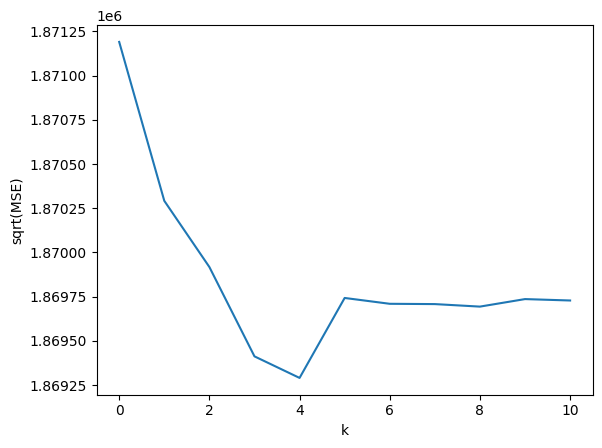

In [159]:
plt.plot(smse[1:])
plt.xlabel('k')
plt.ylabel('sqrt(MSE)')

Best Performance with k = 4

In [163]:
#try different kernels

pca = PCA(n_components=4) # k=4 best MSE
pc_train = pca.fit_transform(x_train)
pc_val = pca.fit_transform(x_val)

# Fit regression model
svr_rbf  = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin  = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_rbf  = svr_rbf.fit(pc_train, y_train).predict(pc_val)
y_lin  = svr_lin.fit(pc_train, y_train).predict(pc_val)
y_poly = svr_poly.fit(pc_train, y_train).predict(pc_val)

mse = np.zeros(3)
mse[0] = mean_squared_error(y_val, y_rbf)
mse[1] = mean_squared_error(y_val, y_lin)
mse[2] = mean_squared_error(y_val, y_poly)
smse = np.sqrt(mse)

Text(0, 0.5, 'sqrt(MSE)')

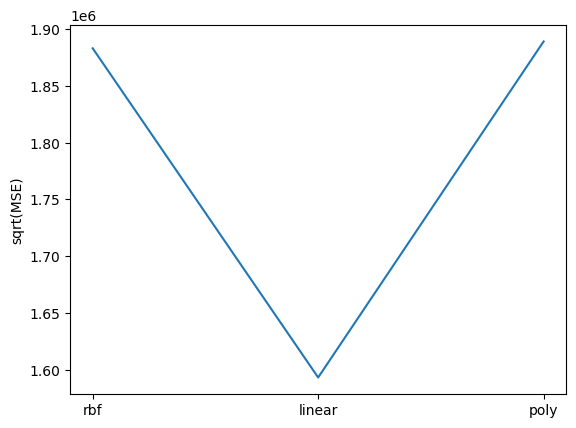

In [164]:
kernels = ['rbf', 'linear', 'poly']
plt.plot(kernels, smse)
#plt.xlabel('')
plt.ylabel('sqrt(MSE)')
